In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from sklearn import preprocessing 
import math
import matplotlib.pyplot as plt
import sys
import seaborn as sb
from scipy import stats


In [2]:
# Read and store Data
trainingData = pd.read_csv('Data/train.csv')
testData = pd.read_csv('Data/test.csv')


In [3]:
# Separate prices from the data
# also, I've randomly shuffled training data in order to check my hypothesis later
prices = trainingData.iloc[0:trainingData.shape[0],trainingData.shape[1]-1:trainingData.shape[1]]


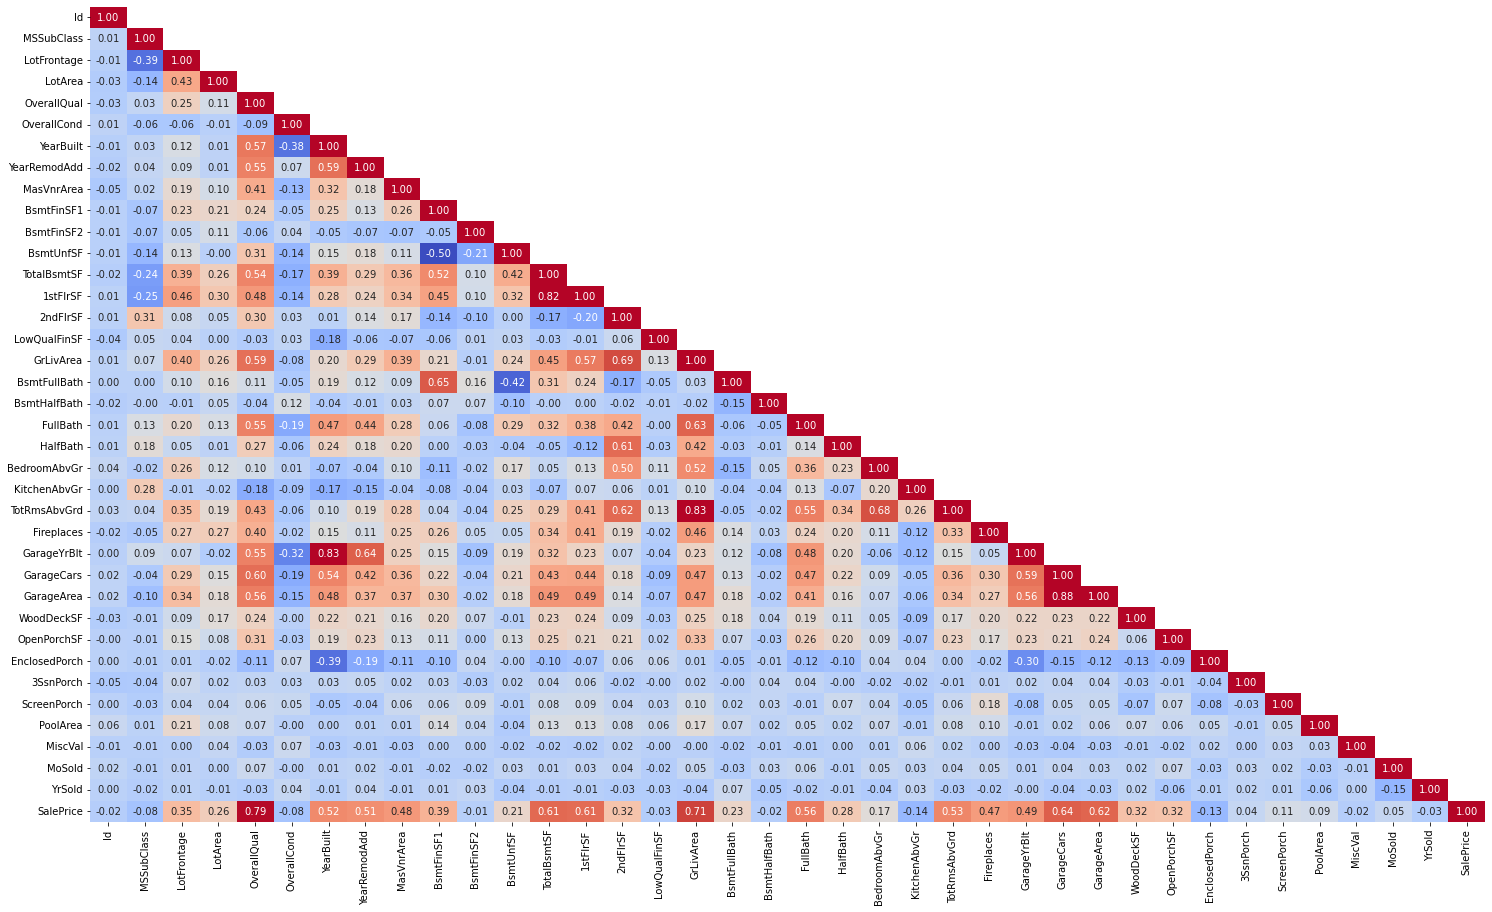

In [4]:
# First of all, I'm gonna construct correlation matrix and drop the columns which do not have any significant influence
# on the prices of the houses 
correlation = trainingData.corr()
f, ax = plt.subplots(figsize=(25, 15))
with sb.axes_style("white"):
    sb.heatmap(correlation,mask=np.triu(correlation,1),annot=True,fmt=".2f", vmax=.8,cbar=False,cmap="coolwarm");


In [5]:
trainingData.drop(columns=['SalePrice','MSSubClass','OverallCond','BsmtUnfSF','LowQualFinSF','BsmtHalfBath','KitchenAbvGr',
                            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'],inplace=True)
testData.drop(columns=['MSSubClass','OverallCond','BsmtUnfSF','LowQualFinSF','BsmtHalfBath','KitchenAbvGr',
                            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'],inplace=True)#

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


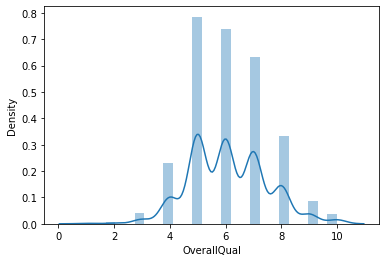

In [6]:
# let's see how values of some of our most important columns are distributed
ax = sb.distplot(trainingData['OverallQual'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


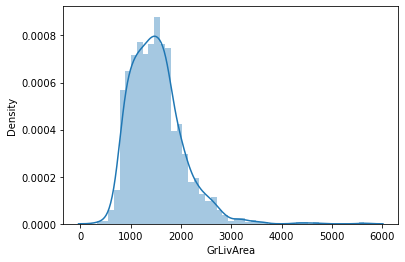

In [7]:
ax = sb.distplot(trainingData['GrLivArea'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


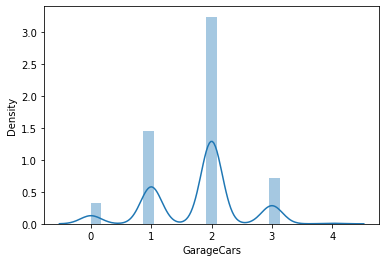

In [8]:
ax = sb.distplot(trainingData['GarageCars'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


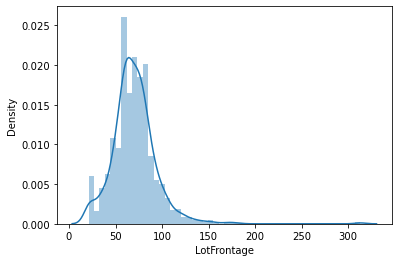

In [9]:
ax = sb.distplot(trainingData['LotFrontage'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


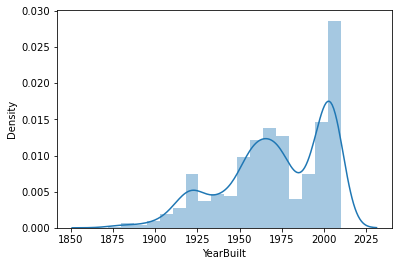

In [10]:
ax = sb.distplot(trainingData['YearBuilt'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


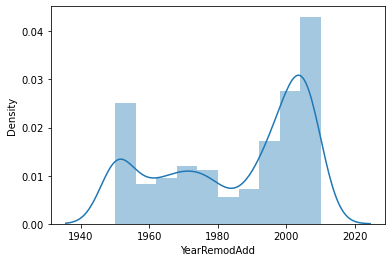

In [11]:
ax = sb.distplot(trainingData['YearRemodAdd'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


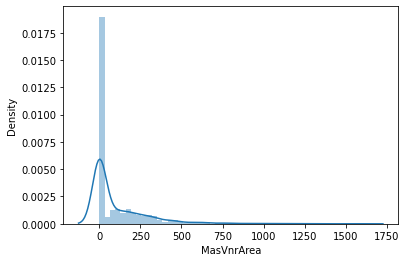

In [12]:
ax = sb.distplot(trainingData['MasVnrArea'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


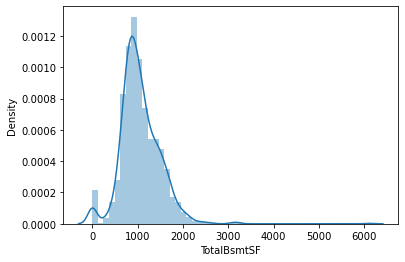

In [13]:
ax = sb.distplot(trainingData['TotalBsmtSF'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


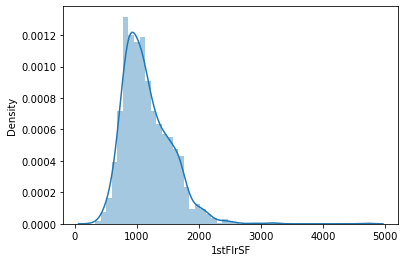

In [14]:
ax = sb.distplot(trainingData['1stFlrSF'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


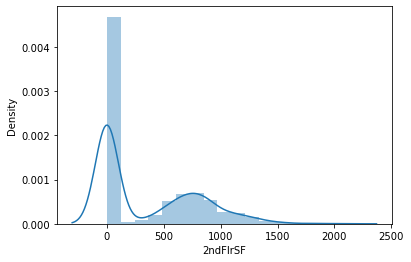

In [15]:
ax = sb.distplot(trainingData['2ndFlrSF'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


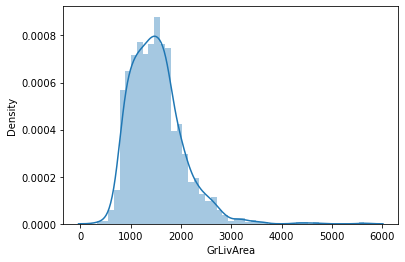

In [16]:
ax = sb.distplot(trainingData['GrLivArea'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


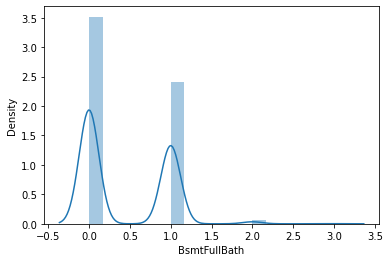

In [17]:
ax = sb.distplot(trainingData['BsmtFullBath'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


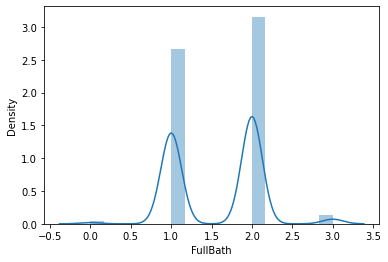

In [18]:
ax = sb.distplot(trainingData['FullBath'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


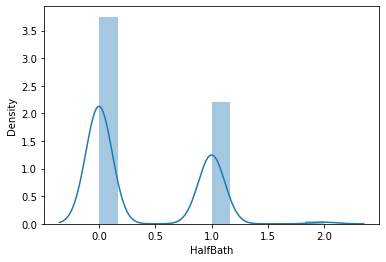

In [19]:
ax = sb.distplot(trainingData['HalfBath'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


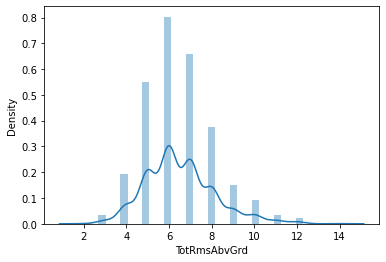

In [20]:
ax = sb.distplot(trainingData['TotRmsAbvGrd'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


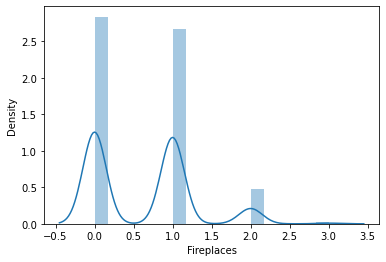

In [21]:
ax = sb.distplot(trainingData['Fireplaces'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


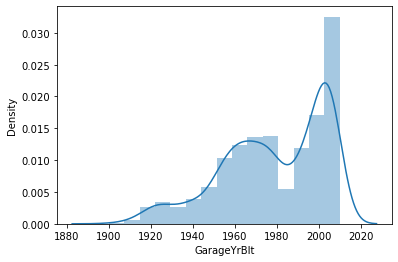

In [22]:
ax = sb.distplot(trainingData['GarageYrBlt'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


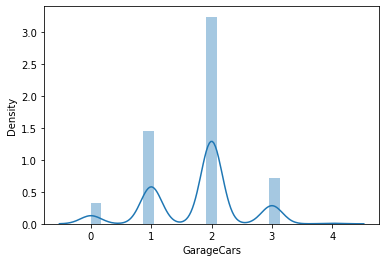

In [23]:
ax = sb.distplot(trainingData['GarageCars'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


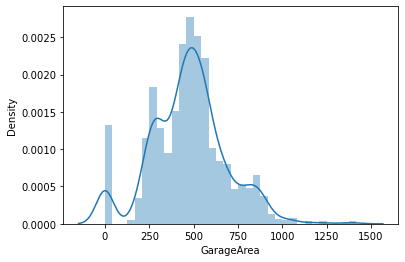

In [24]:
ax = sb.distplot(trainingData['GarageArea'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


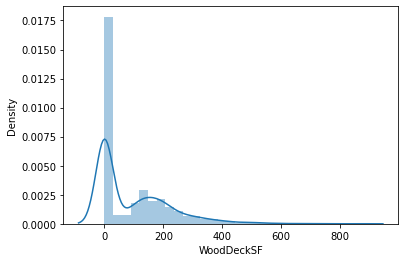

In [25]:
ax = sb.distplot(trainingData['WoodDeckSF'])

C:\Users\tsotn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


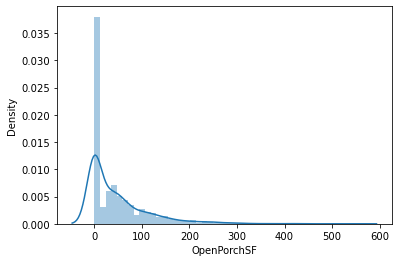

In [26]:
ax = sb.distplot(trainingData['OpenPorchSF'])

In [27]:
# merge training and test data into one dataframe, in order to make same data-handling moves on both of them 
union = pd.concat([trainingData, testData], axis = 0)

In [28]:
# Now we start handling null values in our training Data
# first of all, if there are columns, in which most of the values are null, we can drop this column 
# more concretely, if more than half of the values in the column are null, we may as well drop it from the data
def dropColumnsWithNulls(dataframe):
    colsToDrop = []
    for column in dataframe.columns:
        if dataframe[column].isnull().sum() > dataframe.shape[0]/2:
            colsToDrop.append(column)
    dataframe.drop(columns=colsToDrop,inplace=True)
    

In [29]:
# drop columns with lot of nulls from merged dataframe 
dropColumnsWithNulls(union)

In [30]:
union

Id MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0        1       RL         65.0     8450   Pave      Reg         Lvl   
1        2       RL         80.0     9600   Pave      Reg         Lvl   
2        3       RL         68.0    11250   Pave      IR1         Lvl   
3        4       RL         60.0     9550   Pave      IR1         Lvl   
4        5       RL         84.0    14260   Pave      IR1         Lvl   
...    ...      ...          ...      ...    ...      ...         ...   
1454  2915       RM         21.0     1936   Pave      Reg         Lvl   
1455  2916       RM         21.0     1894   Pave      Reg         Lvl   
1456  2917       RL        160.0    20000   Pave      Reg         Lvl   
1457  2918       RL         62.0    10441   Pave      Reg         Lvl   
1458  2919       RL         74.0     9627   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... GarageFinish GarageCars GarageArea  \
0       AllPub    Inside       Gtl  ...          RFn        2.0      548.0   
1       AllPub       FR2       Gtl  ...          RFn        2.0      460.0   
2       AllPub    Inside       Gtl  ...          RFn        2.0      608.0   
3       AllPub    Corner       Gtl  ...          Unf        3.0      642.0   
4       AllPub       FR2       Gtl  ...          RFn        3.0      836.0   
...        ...       ...       ...  ...          ...        ...        ...   
1454    AllPub    Inside       Gtl  ...          NaN        0.0        0.0   
1455    AllPub    Inside       Gtl  ...          Unf        1.0      286.0   
1456    AllPub    Inside       Gtl  ...          Unf        2.0      576.0   
1457    AllPub    Inside       Gtl  ...          NaN        0.0        0.0   
1458    AllPub    Inside       Mod  ...          Fin        3.0      650.0   

     GarageQual GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF SaleType  \
0            TA         TA           Y           0           61       WD   
1            TA         TA           Y         298            0       WD   
2            TA         TA           Y           0           42       WD   
3            TA         TA           Y           0           35       WD   
4            TA         TA           Y         192           84       WD   
...         ...        ...         ...         ...          ...      ...   
1454        NaN        NaN           Y           0            0       WD   
1455         TA         TA           Y           0           24       WD   
1456         TA         TA           Y         474            0       WD   
1457        NaN        NaN           Y          80           32       WD   
1458         TA         TA           Y         190           48       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3          Abnorml  
4           Normal  
...            ...  
1454        Normal  
1455       Abnorml  
1456       Abnorml  
1457        Normal  
1458        Normal  

[2919 rows x 63 columns]

In [31]:
# Now that we have dropped columns in which most of the values are null, we still have to do something with 
# the remainded ones. 
# More concretely, we need to fill these cells with some values so that they will not mess up anything.   
# This is helper function for my algorithm, which can be summed up as follows: 
# 1. if the column, in which we found null value, is filled with objects other than integers (strings, for example), we 
# write the most common element (i.e. mode) instead;
# 2. And if the type of the elements in the column is in fact integer, we just fill these cells with mean of the
# values written in this column
def fillNullValues(dataframe, columnName):
    if dataframe.dtypes[columnName] == 'object':
        dataframe[columnName].fillna(dataframe[columnName].mode()[0],inplace=True)
        return
    dataframe[columnName].fillna(dataframe[columnName].mean(),inplace=True)
        


In [32]:
# This is main function for our algorithm, which iterates through the columns of the data and if there is null values 
# in them, calls the helper function to deal with them
def handleNullValues(dataframe):
    for column in dataframe.columns:
        if dataframe[column].isnull().sum() == 0:
            continue
        fillNullValues(dataframe, column)

In [33]:
# Just call our functions responsible for handling null values on our merged data 
handleNullValues(union)


In [34]:
# just make sure that our algorithm worked well and there are no null values in our data
nullValuesInTraining = 0
for column in union.columns:
    nullValuesInTraining += union[column].isnull().sum()
print(nullValuesInTraining)

0


In [35]:
# Now that we've handled the null values in our data, it's time to do something about columns the types of which are not 
# numerical. we're going to use dummies values approach on both training and test data.

for column in union.columns: 
    if union.dtypes[column] == 'object':
        tdCopy = pd.get_dummies(union[column])
        union.drop(column, axis = 1, inplace = True)
        union = pd.concat([union,tdCopy],axis = 1)
        

In [36]:
# Now, in order to speed up gradient descent, good practic is to have each of input values in roughly the same range.
# To do this, we'll run feature scaling and mean normalization on our training and test data
def featureScaling(dataframe):
    for column in dataframe.columns:
        if column == 'Id' or column == 'SalePrice':
            continue
        mean = dataframe[column].mean()
        rng = dataframe[column].max()-dataframe[column].min()
        dataframe[column] -= mean
        dataframe[column] /= rng 


In [37]:
#Call featureScaling on trainingData and testData
featureScaling(union)


In [38]:
# Now that we handled some issues about given data, it's time to separate training and data sets again 
trainingData = union.iloc[0:trainingData.shape[0],0:union.shape[1]]

In [39]:
trainingData

Id  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0        1    -0.014746 -0.008031     0.101214   0.229618      0.312259   
1        2     0.036624 -0.002655    -0.009897   0.033965     -0.137741   
2        3    -0.004472  0.005057     0.101214   0.215125      0.295592   
3        4    -0.031869 -0.002889     0.101214  -0.408064     -0.237741   
4        5     0.050323  0.019126     0.212325   0.207878      0.262259   
...    ...          ...       ...          ...        ...           ...   
1455  1456    -0.025020 -0.010522    -0.009897   0.200632      0.262259   
1456  1457     0.053747  0.014054    -0.009897   0.048458      0.062259   
1457  1458    -0.011321 -0.005264     0.101214  -0.219658      0.362259   
1458  1459    -0.004472 -0.002109    -0.121008  -0.154440      0.195592   
1459  1460     0.019501 -0.001080    -0.121008  -0.045745     -0.321075   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...     ConLw  \
0       0.058624    0.046878   -0.032492    -0.032042  ... -0.002741   
1      -0.063876    0.095070   -0.032492     0.034406  ... -0.002741   
2       0.037374    0.007898   -0.032492    -0.021568  ... -0.002741   
3      -0.063876   -0.039940   -0.032492    -0.048409  ... -0.002741   
4       0.154874    0.037841   -0.032492     0.015257  ... -0.002741   
...          ...         ...         ...          ...  ...       ...   
1455   -0.063876   -0.078211   -0.032492    -0.016167  ... -0.002741   
1456    0.010499    0.061761    0.074324     0.080233  ... -0.002741   
1457   -0.063876   -0.029487   -0.032492     0.016403  ... -0.002741   
1458   -0.063876   -0.069529    0.641820     0.004292  ... -0.002741   
1459   -0.063876    0.068848    0.157548     0.033424  ... -0.002741   

           New       Oth        WD   Abnorml   AdjLand    Alloca    Family  \
0    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
2    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
3    -0.081877 -0.002398  0.134635  0.934909 -0.004111 -0.008222 -0.015759   
4    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
...        ...       ...       ...       ...       ...       ...       ...   
1455 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1456 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1457 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1458 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1459 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   

        Normal   Partial  
0     0.177115 -0.083933  
1     0.177115 -0.083933  
2     0.177115 -0.083933  
3    -0.822885 -0.083933  
4     0.177115 -0.083933  
...        ...       ...  
1455  0.177115 -0.083933  
1456  0.177115 -0.083933  
1457  0.177115 -0.083933  
1458  0.177115 -0.083933  
1459  0.177115 -0.083933  

[1460 rows x 263 columns]

In [40]:
testData = union.iloc[trainingData.shape[0]:union.shape[0],0:union.shape[1]]

In [41]:
testData

Id  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0     1461     0.036624  0.006796    -0.121008  -0.074730     -0.387741   
1     1462     0.040049  0.019159    -0.009897  -0.096469     -0.437741   
2     1463     0.016076  0.017116    -0.121008   0.186139      0.228925   
3     1464     0.029775 -0.000889    -0.009897   0.193386      0.228925   
4     1465    -0.090088 -0.024133     0.212325   0.149907      0.128925   
...    ...          ...       ...          ...        ...           ...   
1454  2915    -0.165431 -0.038478    -0.232119  -0.009513     -0.237741   
1455  2916    -0.165431 -0.038674    -0.232119  -0.009513     -0.237741   
1456  2917     0.310597  0.045955    -0.121008  -0.081977      0.195592   
1457  2918    -0.025020  0.001275    -0.121008   0.149907      0.128925   
1458  2919     0.016076 -0.002529     0.101214   0.157154      0.162259   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...     ConLw  \
0      -0.063876    0.004709    0.061873    -0.027787  ... -0.002741   
1       0.003624    0.085325   -0.032492     0.045372  ... -0.002741   
2      -0.063876    0.061938   -0.032492    -0.020258  ... -0.002741   
3      -0.051376    0.028451   -0.032492    -0.020586  ... -0.002741   
4      -0.063876   -0.031613   -0.032492     0.037352  ... -0.002741   
...          ...         ...         ...          ...  ...       ...   
1454   -0.063876   -0.078211   -0.032492    -0.082779  ... -0.002741   
1455   -0.063876   -0.033562   -0.032492    -0.082779  ... -0.002741   
1456   -0.063876    0.138656   -0.032492     0.028187  ... -0.002741   
1457   -0.063876   -0.018502   -0.032492    -0.022877  ... -0.002741   
1458   -0.005126    0.056091   -0.032492    -0.009129  ... -0.002741   

           New       Oth        WD   Abnorml   AdjLand    Alloca    Family  \
0    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
2    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
3    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
4    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
...        ...       ...       ...       ...       ...       ...       ...   
1454 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1455 -0.081877 -0.002398  0.134635  0.934909 -0.004111 -0.008222 -0.015759   
1456 -0.081877 -0.002398  0.134635  0.934909 -0.004111 -0.008222 -0.015759   
1457 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1458 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   

        Normal   Partial  
0     0.177115 -0.083933  
1     0.177115 -0.083933  
2     0.177115 -0.083933  
3     0.177115 -0.083933  
4     0.177115 -0.083933  
...        ...       ...  
1454  0.177115 -0.083933  
1455 -0.822885 -0.083933  
1456 -0.822885 -0.083933  
1457  0.177115 -0.083933  
1458  0.177115 -0.083933  

[1459 rows x 263 columns]

In [42]:
# Separate IDs' column from test Data (It will be used in the last part of assignment for the submission file)
testIds = testData.iloc[0:testData.shape[0],0:1]

In [43]:
testIds

Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [44]:
# This function just adds column filled with 1-s to the data (for Theta0 parameter)
# returns converted DataFrame and Price
def convertData(data):
    additionalFeature = np.full(data.shape[0],1)
    addedFeature = pd.DataFrame(additionalFeature) 
    data = pd.concat([addedFeature,data.iloc[0:data.shape[0], 0:data.shape[1]]], axis = 1) 
    return data
    

In [45]:
# Just call convertData on training and test Data, and also drop IDs' column from both of them 
trainingData = convertData(trainingData)
testData = convertData(testData)
tdWithoutIds = trainingData.drop(columns=['Id'],inplace = False)
testWithoutIds = testData.drop(columns=['Id'],inplace = False)

In [46]:
tdWithoutIds

0  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0     1    -0.014746 -0.008031     0.101214   0.229618      0.312259   
1     1     0.036624 -0.002655    -0.009897   0.033965     -0.137741   
2     1    -0.004472  0.005057     0.101214   0.215125      0.295592   
3     1    -0.031869 -0.002889     0.101214  -0.408064     -0.237741   
4     1     0.050323  0.019126     0.212325   0.207878      0.262259   
...  ..          ...       ...          ...        ...           ...   
1455  1    -0.025020 -0.010522    -0.009897   0.200632      0.262259   
1456  1     0.053747  0.014054    -0.009897   0.048458      0.062259   
1457  1    -0.011321 -0.005264     0.101214  -0.219658      0.362259   
1458  1    -0.004472 -0.002109    -0.121008  -0.154440      0.195592   
1459  1     0.019501 -0.001080    -0.121008  -0.045745     -0.321075   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...     ConLw  \
0       0.058624    0.046878   -0.032492    -0.032042  ... -0.002741   
1      -0.063876    0.095070   -0.032492     0.034406  ... -0.002741   
2       0.037374    0.007898   -0.032492    -0.021568  ... -0.002741   
3      -0.063876   -0.039940   -0.032492    -0.048409  ... -0.002741   
4       0.154874    0.037841   -0.032492     0.015257  ... -0.002741   
...          ...         ...         ...          ...  ...       ...   
1455   -0.063876   -0.078211   -0.032492    -0.016167  ... -0.002741   
1456    0.010499    0.061761    0.074324     0.080233  ... -0.002741   
1457   -0.063876   -0.029487   -0.032492     0.016403  ... -0.002741   
1458   -0.063876   -0.069529    0.641820     0.004292  ... -0.002741   
1459   -0.063876    0.068848    0.157548     0.033424  ... -0.002741   

           New       Oth        WD   Abnorml   AdjLand    Alloca    Family  \
0    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
2    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
3    -0.081877 -0.002398  0.134635  0.934909 -0.004111 -0.008222 -0.015759   
4    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
...        ...       ...       ...       ...       ...       ...       ...   
1455 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1456 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1457 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1458 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1459 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   

        Normal   Partial  
0     0.177115 -0.083933  
1     0.177115 -0.083933  
2     0.177115 -0.083933  
3    -0.822885 -0.083933  
4     0.177115 -0.083933  
...        ...       ...  
1455  0.177115 -0.083933  
1456  0.177115 -0.083933  
1457  0.177115 -0.083933  
1458  0.177115 -0.083933  
1459  0.177115 -0.083933  

[1460 rows x 263 columns]

In [47]:
testWithoutIds

0  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0     1     0.036624  0.006796    -0.121008  -0.074730     -0.387741   
1     1     0.040049  0.019159    -0.009897  -0.096469     -0.437741   
2     1     0.016076  0.017116    -0.121008   0.186139      0.228925   
3     1     0.029775 -0.000889    -0.009897   0.193386      0.228925   
4     1    -0.090088 -0.024133     0.212325   0.149907      0.128925   
...  ..          ...       ...          ...        ...           ...   
1454  1    -0.165431 -0.038478    -0.232119  -0.009513     -0.237741   
1455  1    -0.165431 -0.038674    -0.232119  -0.009513     -0.237741   
1456  1     0.310597  0.045955    -0.121008  -0.081977      0.195592   
1457  1    -0.025020  0.001275    -0.121008   0.149907      0.128925   
1458  1     0.016076 -0.002529     0.101214   0.157154      0.162259   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...     ConLw  \
0      -0.063876    0.004709    0.061873    -0.027787  ... -0.002741   
1       0.003624    0.085325   -0.032492     0.045372  ... -0.002741   
2      -0.063876    0.061938   -0.032492    -0.020258  ... -0.002741   
3      -0.051376    0.028451   -0.032492    -0.020586  ... -0.002741   
4      -0.063876   -0.031613   -0.032492     0.037352  ... -0.002741   
...          ...         ...         ...          ...  ...       ...   
1454   -0.063876   -0.078211   -0.032492    -0.082779  ... -0.002741   
1455   -0.063876   -0.033562   -0.032492    -0.082779  ... -0.002741   
1456   -0.063876    0.138656   -0.032492     0.028187  ... -0.002741   
1457   -0.063876   -0.018502   -0.032492    -0.022877  ... -0.002741   
1458   -0.005126    0.056091   -0.032492    -0.009129  ... -0.002741   

           New       Oth        WD   Abnorml   AdjLand    Alloca    Family  \
0    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
2    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
3    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
4    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
...        ...       ...       ...       ...       ...       ...       ...   
1454 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1455 -0.081877 -0.002398  0.134635  0.934909 -0.004111 -0.008222 -0.015759   
1456 -0.081877 -0.002398  0.134635  0.934909 -0.004111 -0.008222 -0.015759   
1457 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1458 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   

        Normal   Partial  
0     0.177115 -0.083933  
1     0.177115 -0.083933  
2     0.177115 -0.083933  
3     0.177115 -0.083933  
4     0.177115 -0.083933  
...        ...       ...  
1454  0.177115 -0.083933  
1455 -0.822885 -0.083933  
1456 -0.822885 -0.083933  
1457  0.177115 -0.083933  
1458  0.177115 -0.083933  

[1459 rows x 263 columns]

In [48]:
# Now we divide our training data into training Set and Cross Validation Set (70%-30%)
trainingSet = tdWithoutIds.iloc[0:math.trunc(tdWithoutIds.shape[0]*0.7), 0:tdWithoutIds.shape[1]]
tsPrices = prices.iloc[0:trainingSet.shape[0]]


In [49]:
trainingSet

0   LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
0     1 -1.474587e-02 -0.008031     0.101214   0.229618      0.312259   
1     1  3.662399e-02 -0.002655    -0.009897   0.033965     -0.137741   
2     1 -4.471902e-03  0.005057     0.101214   0.215125      0.295592   
3     1 -3.186916e-02 -0.002889     0.101214  -0.408064     -0.237741   
4     1  5.032262e-02  0.019126     0.212325   0.207878      0.262259   
...  ..           ...       ...          ...        ...           ...   
1016  1  1.265139e-02  0.008016     0.101214   0.178893      0.195592   
1017  1 -1.314017e-15 -0.020352     0.212325   0.091936     -0.004408   
1018  1 -1.314017e-15  0.002879     0.101214   0.142661      0.128925   
1019  1 -9.008834e-02 -0.033444     0.101214   0.244110      0.345592   
1020  1 -3.186916e-02 -0.014696    -0.232119   0.244110      0.345592   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...     ConLw  \
0       0.058624    0.046878   -0.032492    -0.032042  ... -0.002741   
1      -0.063876    0.095070   -0.032492     0.034406  ... -0.002741   
2       0.037374    0.007898   -0.032492    -0.021568  ... -0.002741   
3      -0.063876   -0.039940   -0.032492    -0.048409  ... -0.002741   
4       0.154874    0.037841   -0.032492     0.015257  ... -0.002741   
...          ...         ...         ...          ...  ...       ...   
1016    0.058624    0.044043   -0.032492     0.074013  ... -0.002741   
1017   -0.063876    0.105347   -0.032492     0.027532  ... -0.002741   
1018   -0.016376   -0.078211   -0.032492    -0.109293  ... -0.002741   
1019    0.026749   -0.075376   -0.032492     0.050773  ... -0.002741   
1020   -0.063876    0.103221   -0.032492     0.013130  ... -0.002741   

           New       Oth        WD   Abnorml   AdjLand    Alloca    Family  \
0    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
2    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
3    -0.081877 -0.002398  0.134635  0.934909 -0.004111 -0.008222 -0.015759   
4    -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
...        ...       ...       ...       ...       ...       ...       ...   
1016 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1017 -0.081877 -0.002398 -0.865365  0.934909 -0.004111 -0.008222 -0.015759   
1018 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1019 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1020 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   

        Normal   Partial  
0     0.177115 -0.083933  
1     0.177115 -0.083933  
2     0.177115 -0.083933  
3    -0.822885 -0.083933  
4     0.177115 -0.083933  
...        ...       ...  
1016  0.177115 -0.083933  
1017 -0.822885 -0.083933  
1018  0.177115 -0.083933  
1019  0.177115 -0.083933  
1020  0.177115 -0.083933  

[1021 rows x 263 columns]

In [50]:
tsPrices

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1016     203000
1017     187500
1018     160000
1019     213490
1020     176000

[1021 rows x 1 columns]

In [51]:
tdWithoutIds.columns

Index([             0,  'LotFrontage',      'LotArea',  'OverallQual',
          'YearBuilt', 'YearRemodAdd',   'MasVnrArea',   'BsmtFinSF1',
         'BsmtFinSF2',  'TotalBsmtSF',
       ...
              'ConLw',          'New',          'Oth',           'WD',
            'Abnorml',      'AdjLand',       'Alloca',       'Family',
             'Normal',      'Partial'],
      dtype='object', length=263)

In [52]:
cvSet = tdWithoutIds.iloc[math.trunc(tdWithoutIds.shape[0]*0.7):tdWithoutIds.shape[0], 0:tdWithoutIds.shape[1]]
cvPrices = prices.iloc[math.trunc(tdWithoutIds.shape[0]*0.7):tdWithoutIds.shape[0],0:prices.shape[1]]


In [53]:
cvSet

0   LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
1021  1 -1.817053e-02 -0.012910     0.101214   0.251357      0.362259   
1022  1 -5.926642e-02 -0.003408    -0.121008  -0.299368     -0.571075   
1023  1 -9.008834e-02 -0.032654     0.101214   0.244110      0.362259   
1024  1 -1.314017e-15  0.024912     0.212325   0.033965     -0.137741   
1025  1  2.377413e-03 -0.011536    -0.121008   0.004980     -0.204408   
...  ..           ...       ...          ...        ...           ...   
1455  1 -2.501985e-02 -0.010522    -0.009897   0.200632      0.262259   
1456  1  5.374728e-02  0.014054    -0.009897   0.048458      0.062259   
1457  1 -1.132122e-02 -0.005264     0.101214  -0.219658      0.362259   
1458  1 -4.471902e-03 -0.002109    -0.121008  -0.154440      0.195592   
1459  1  1.950070e-02 -0.001080    -0.121008  -0.045745     -0.321075   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...     ConLw  \
1021   -0.011376    0.042980   -0.032492     0.024095  ... -0.002741   
1022   -0.063876   -0.020805   -0.032492    -0.022877  ... -0.002741   
1023   -0.055126   -0.075376   -0.032492     0.048154  ... -0.002741   
1024   -0.063876    0.128203    0.229632     0.083997  ... -0.002741   
1025   -0.063876   -0.053760    0.274192    -0.027787  ... -0.002741   
...          ...         ...         ...          ...  ...       ...   
1455   -0.063876   -0.078211   -0.032492    -0.016167  ... -0.002741   
1456    0.010499    0.061761    0.074324     0.080233  ... -0.002741   
1457   -0.063876   -0.029487   -0.032492     0.016403  ... -0.002741   
1458   -0.063876   -0.069529    0.641820     0.004292  ... -0.002741   
1459   -0.063876    0.068848    0.157548     0.033424  ... -0.002741   

           New       Oth        WD   Abnorml   AdjLand    Alloca    Family  \
1021  0.918123 -0.002398 -0.865365 -0.065091 -0.004111 -0.008222 -0.015759   
1022 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1023 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1024 -0.081877 -0.002398 -0.865365  0.934909 -0.004111 -0.008222 -0.015759   
1025 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
...        ...       ...       ...       ...       ...       ...       ...   
1455 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1456 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1457 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1458 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   
1459 -0.081877 -0.002398  0.134635 -0.065091 -0.004111 -0.008222 -0.015759   

        Normal   Partial  
1021 -0.822885  0.916067  
1022  0.177115 -0.083933  
1023  0.177115 -0.083933  
1024 -0.822885 -0.083933  
1025  0.177115 -0.083933  
...        ...       ...  
1455  0.177115 -0.083933  
1456  0.177115 -0.083933  
1457  0.177115 -0.083933  
1458  0.177115 -0.083933  
1459  0.177115 -0.083933  

[439 rows x 263 columns]

In [54]:
# Cost Function for Gradient Descent
def costFunction(data,prices,theta):
    return np.sum(np.square(data*np.transpose(theta)-prices))/2/data.shape[0]


In [55]:
# Actual implementation of our Gradient Descent Algorithm
# Algorithm is run until convergence happens, which is checked by dividing new cost by the one from previous iteration
def gradientDescent(data, prices, alpha, limit, lmb):
    theta=np.matrix(np.zeros(data.shape[1]))
    parameters = int(theta.ravel().shape[1])
 ##   cost = np.zeros(iters)
    prevCost = sys.maxsize
    newCost = sys.maxsize*0.9
    while newCost/prevCost<limit:
        prevCost = newCost
        thetaZ = theta.item(0)
        theta = theta - theta * alpha * lmb/data.shape[0]
        thetaArr = np.array(theta)
        thetaArr[0][0] += thetaZ * alpha*lmb/data.shape[0]
        theta = np.matrix(thetaArr)
        theta = theta - np.transpose(data.transpose() * (data * np.transpose(theta) - prices)) * alpha / data.shape[0]
        newCost = costFunction(data, prices, theta)
    return theta

In [56]:
# Now that we have working implementation of gradient descent, it's time to choose parameters alpha, lambda and covergence 
# limit
# For alpha and covergence limit, respectively 0.2 and 0.9999999 turned out to be pretty good values for me after 
# running some experiments on them
# but Those values are not as hard to choose, for starters, both of them are in range [0:1], and we also know alpha should
# be closer to 0 than 1, while for covergence limit it's the other way around, so just running gradient descent for 
# different values of these variables showed me that when alpha is 0.2, algorithm doesn't make too big steps (so that it
# could potentially miss global minimum) and is big enough for Gradient Descent to finish working soon.
# I could say the same about covergence limit, the closer it is to one the better, and 0.9999999 also turned out to be just
# fine value but for one last final call. During graphing learning curves, I'll actually use smaller value for it - 0.999
# but for lambda, we don't have pre-defined range, so we must start with some value and graph learning curves so that the
# process of choosing it doesn't go just randomly but it's justified with theoretical information about high variance or bias 
# covered in this course.


In [57]:
# This is the method actually responsible for graphing learning curves on cartesian coordinate system. 
# The learning curves are basically the visualization of correlation between Cost functions on training and cross validation
# sets and the size of training set on which we build the model (run gradient descent)
# so, basically the algorithm is pretty simple:
# we iteratively increase size of training set we are using to construct model and on each iteration, we compute our model's
# cost (error) on both training and cross validation error
def graphLearningCurves(lim, lmb):
    costsOnTraining=[]
    costsOnCVSet = []
    m=20
    while (m<=trainingSet.shape[0]):
        currtraining = trainingSet.iloc[0:min(m,trainingSet.shape[0]), 0:trainingSet.shape[1]]
        currprices = tsPrices.iloc[0:min(m,tsPrices.shape[0]),0:1]
        currtheta = gradientDescent(np.matrix(currtraining),np.matrix(currprices),0.2,lim, lmb)
        costsOnTraining.append(costFunction(np.matrix(currtraining), np.matrix(currprices),currtheta))
        costsOnCVSet.append(costFunction(np.matrix(cvSet),np.matrix(cvPrices),currtheta))
        m=m+20
        ##print(currtheta)
        ##print(m)

    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(np.arange(len(costsOnTraining)), costsOnTraining, 'r')
    ax.plot(np.arange(len(costsOnCVSet)), costsOnCVSet, 'b')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs. Training Epoch')

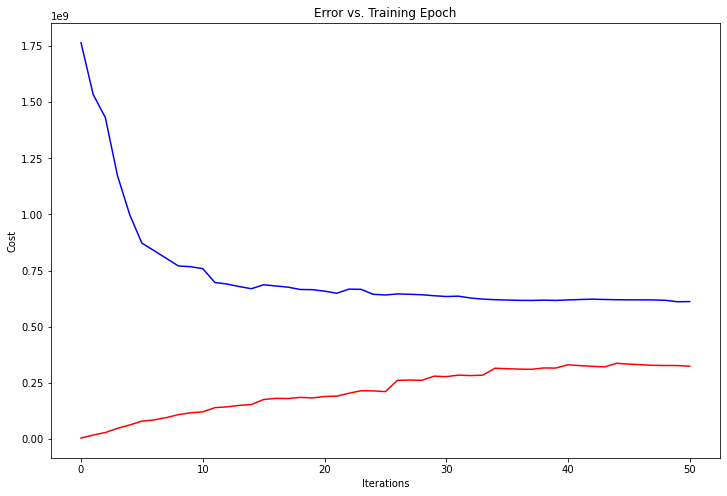

In [58]:
# for the beginning, I tried lambda = 1 for the first try
graphLearningCurves(0.999,1) 

In [59]:
# Now we see average error on cv set for our chosen parameters
# I compute cost on cv set and divide it on the mean price of the houses in it 
# so the computed value indicates average error in percentage 
theta = gradientDescent(np.matrix(trainingSet),np.matrix(tsPrices),0.2,0.99999999,1)
print(math.sqrt(costFunction(np.matrix(cvSet),np.matrix(cvPrices),theta))/cvPrices['SalePrice'].mean())

0.1493702320810234


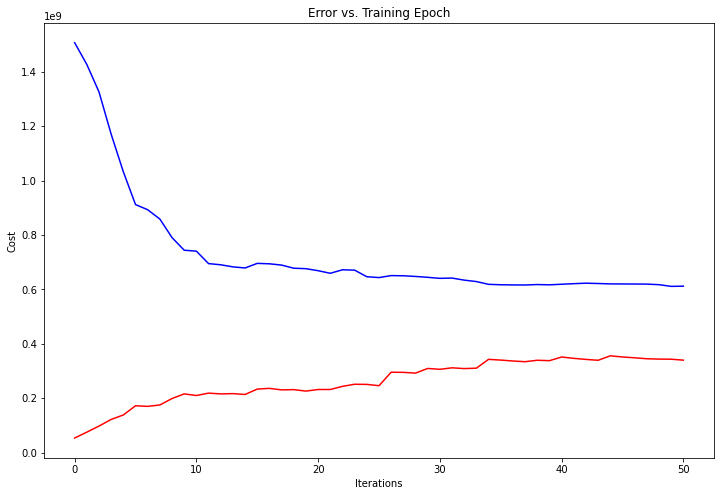

In [60]:
# Clearly, Our chosen lambda was too small. Graphs (red one is for error on training Set, blue is the one for
# cost validation) indicate the case of high variance, during which, for small training set, training error is quite low, 
# and cross validation error is quite high, and with increasing size of the training set, the difference between these errors
# is decreasing but remains significant
# So let's just try bigger values for lambda
graphLearningCurves(0.999,5) 

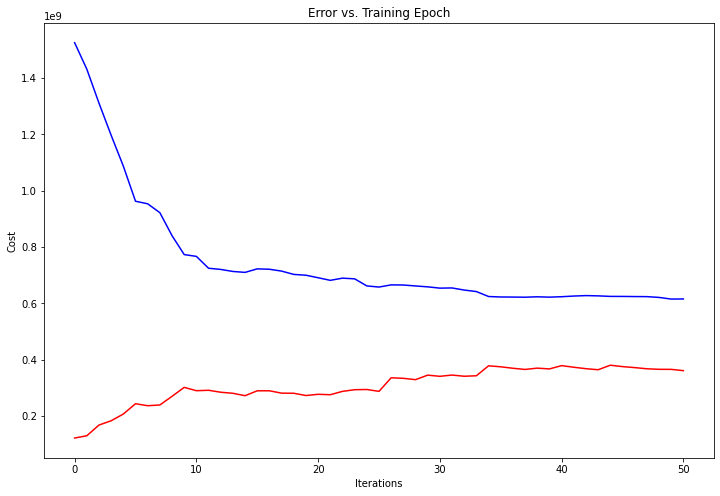

In [61]:
# Lambda = 5 is better fit, but let's just keep going up to see if we can improve our error
# Problem is still high variance, so we increase lambda once again
graphLearningCurves(0.999,10) 

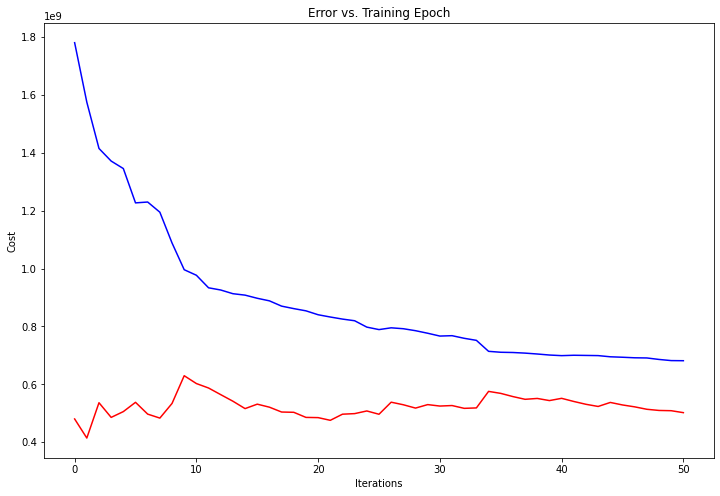

In [62]:
graphLearningCurves(0.999,50) 

In [63]:
theta = gradientDescent(np.matrix(trainingSet),np.matrix(tsPrices),0.2,0.99999999,50)
print(math.sqrt(costFunction(np.matrix(cvSet),np.matrix(cvPrices),theta))/cvPrices['SalePrice'].mean())

0.14393977132216126


In [64]:
# It seems that for lambda = 50, we fixed high variance problem, but error is still quite big for me, so let's 
# just try smaller values now 

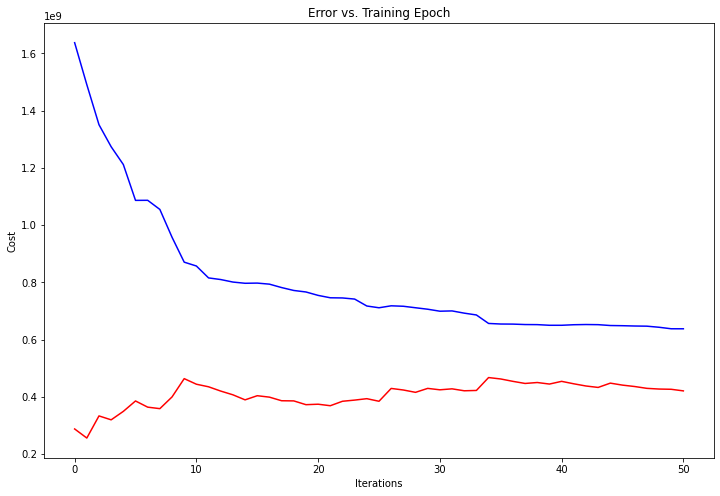

In [65]:
graphLearningCurves(0.999,25) 

In [66]:
theta = gradientDescent(np.matrix(trainingSet),np.matrix(tsPrices),0.2,0.99999999,25)
print(math.sqrt(costFunction(np.matrix(cvSet),np.matrix(cvPrices),theta))/cvPrices['SalePrice'].mean())

0.13914392970506453


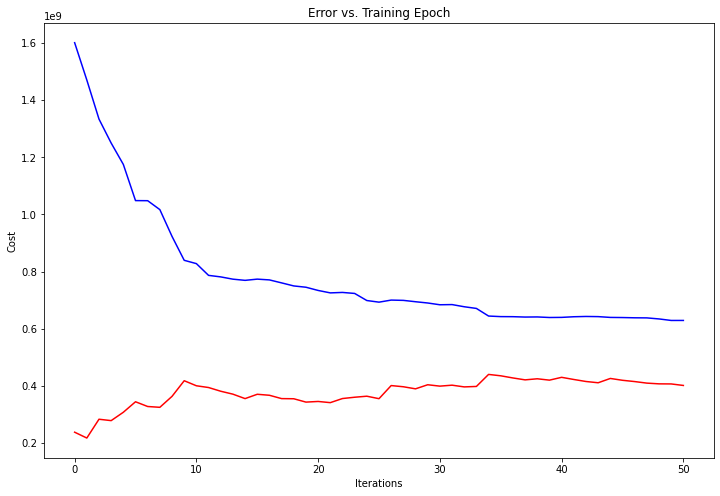

In [67]:
graphLearningCurves(0.999,20) 

In [68]:
theta = gradientDescent(np.matrix(trainingSet),np.matrix(tsPrices),0.2,0.99999999,20)
print(math.sqrt(costFunction(np.matrix(cvSet),np.matrix(cvPrices),theta))/cvPrices['SalePrice'].mean())

0.1383970429705968


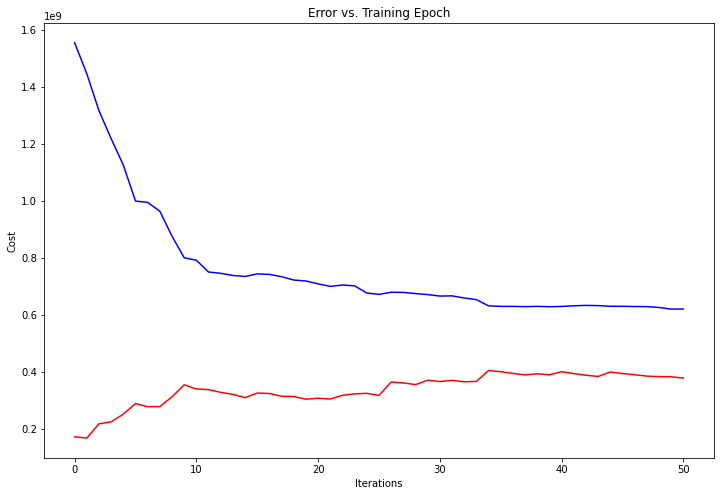

In [69]:
graphLearningCurves(0.999,14)

In [70]:
theta = gradientDescent(np.matrix(trainingSet),np.matrix(tsPrices),0.2,0.99999999,14)
print(math.sqrt(costFunction(np.matrix(cvSet),np.matrix(cvPrices),theta))/cvPrices['SalePrice'].mean())

0.13794454978371146


In [71]:
# for me it seems that lambda = 14 is quite good fit, so I'm going to choose it as my final preffered value 
predictions = pd.DataFrame(np.matrix(testWithoutIds.values) * np.transpose(theta), columns =['SalePrice'])
predictions = pd.concat([testIds,predictions],axis = 1)
predictions.to_csv('submission.csv',index=False)